In [1]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

# Histórico de cotação da ação VALE3 na Bolsa de Valores
data_inicial = "05/20/2020"
data_final = "05/20/2021"
df = web.DataReader('VALE3.SA', data_source = 'yahoo', start = data_inicial, end = data_final) # Busca informação na internet
display(df.head(8)) # Apresenta tabela para o usuário
dias = np.linspace(0, len(df), len(df)) # Dias de cotação
df.to_excel("Bolsa de Valores.xlsx", sheet_name = 'VALE3', index = True) # Salva arquivo excel no computador

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-20,53.669998,52.500000,53.369999,52.500000,27014500.0,48.221073
2020-05-21,52.660000,50.369999,52.290001,51.130001,41802300.0,46.962734
2020-05-22,51.099998,49.900002,50.770000,50.270000,23933600.0,46.172825
2020-05-25,51.680000,49.919998,51.410000,50.099998,21162000.0,46.016682
2020-05-26,50.520000,48.840000,50.380001,49.200001,28917800.0,45.190037
2020-05-27,50.830002,48.779999,49.840000,50.639999,31932100.0,46.512669
2020-05-28,51.650002,50.049999,51.000000,50.090000,23530900.0,46.007500
2020-05-29,53.000000,51.060001,51.400002,53.000000,92646300.0,48.680321


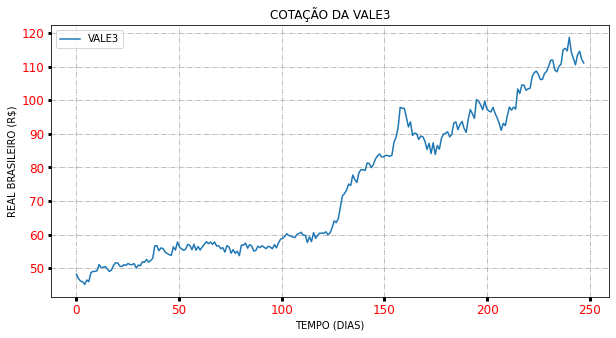

In [2]:
# Configurações do gráfico da cotação da ação VALE3 na Bolsa de Valores
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(dias, df['Adj Close'], label = 'VALE3')
ax.set(xlabel = 'TEMPO (DIAS)', ylabel = 'REAL BRASILEIRO (R$)', title = 'COTAÇÃO DA VALE3')
ax.grid(True, linestyle = '-.')
ax.tick_params(labelcolor = 'r', labelsize = 'large', width = 3)
fig.savefig('Cotação VALE3.png', dpi = 300) # Salva a figura no computador
ax.legend() # Legenda da figura
plt.show() #  Apresenta a figura para o usuário

In [19]:
# Importando bibliotecas necessárias
import requests

request = requests.get('https://economia.awesomeapi.com.br/all/USD-BRL') # Busca informação na internet
quotation = request.json() # Desserialização do retorno da API
dolar = float(quotation['USD']['bid']) # Última cotação do dólar
dolar_date = quotation['USD']['create_date']
print('A cotação do dólar hoje ' + quotation['USD']['create_date'],'é R$' + quotation['USD']['bid'] +'.')
print('A cotação do dólar hoje ({}) é R${:.5}.'.format(dolar_date, dolar)) # Mostra para o usuário

A cotação do dólar hoje 2021-05-20 18:00:08 é R$5.2823.
A cotação do dólar hoje (2021-05-20 18:00:08) é R$5.2823.


In [4]:
# Cálculo de métricas
vale3_first = df.iloc[0]['Adj Close'] # Primeira cotação da ação VALE3
vale3_last = df.iloc[246]['Adj Close'] # Última cotação da ação VALE3
crescimento = vale3_last / vale3_first - 1 # Crescimento percentual
print('As ações da Empresa Vale valorizaram {:.2%} nos últimos {} dias úteis.'.format(crescimento, len(dias)))
print('Sendo cotada a R${} no último pregão da bolsa de valores ({}).'.format(round(vale3_last,2), data_final))

As ações da Empresa Vale valorizaram 130.42% nos últimos 247 dias úteis.
Sendo cotada a R$111.11 no último pregão da bolsa de valores (05/20/2021).


In [20]:
# Importando bibliotecas necessárias
import win32com.client as win32

outlook = win32.Dispatch('outlook.application') # Criar a integração com o outlook
email = outlook.CreateItem(0) # Criar um e-mail

# configurar as informações do seu e-mail
email.To = "luis.mesquita.castro@gmail.com"
email.Subject = "Cotação de Ações: E-mail Automático via Python"
email.HTMLBody = """
<p>Olá Luís Augusto, aqui é o seu código Python!</p>

<p>As ações da Empresa Vale valorizaram {:.2%} nos últimos {} dias úteis.</p>
<p>Sendo cotada a R${} no último pregão da bolsa de valores ({}).</p>

<p>Por fim, a cotação do dólar hoje ({}) é R${:.5}.<p>

<p>Cordialmente,</p>
<p>Código Python Bolsa de Valores.</p>
""".format(crescimento, len(dias), round(vale3_last,2), data_final, dolar_date, dolar)

anexo01 = 'C://Users/luism/Google Drive/Python Arquivos/Jupyter Exemplos/Bolsa de Valores.xlsx'
email.Attachments.Add(anexo01) # Anexar arquivo ao e-mail
anexo02 = 'C://Users/luism/Google Drive/Python Arquivos/Jupyter Exemplos/Cotação VALE3.png'
email.Attachments.Add(anexo02) # Anexar arquivo ao e-mail

email.Send() # Enviar o e-mail
print("E-mail enviado com sucesso.") # Apresenta para o usuário que o e-mail foi enviado

E-mail enviado com sucesso.
